## Objective

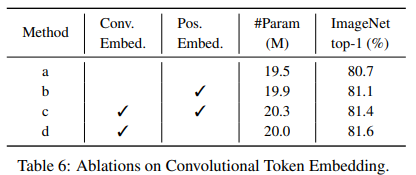

**Conv. Embed. and Pos. Embed. Performance change** experiment was conducted with or without each. The CvT network takes about 20 hours to train ImageNet 1k by 1 epoch. Therefore, due to the limitations of time cost and computing power, training and validation were conducted with ImageNet's subset, Imagenette2.

## Data Download

 - Download ImageNet Dataset to colab via fastai

 - [Reference]

  https://github.com/fastai/imagenette

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/FinalProject/CvT-main/DATASET/imagenette2

/content/drive/MyDrive/FinalProject/CvT-main/DATASET/imagenette2


In [ ]:
# Downloaded the imagenet subset from fastai 
# And Unzip

!tar -xvzf imagenette2.tgz

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
imagenette2/train/n03888257/n03888257_16077.JPEG
imagenette2/train/n03888257/n03888257_23339.JPEG
imagenette2/train/n03888257/n03888257_44204.JPEG
imagenette2/train/n03888257/n03888257_61633.JPEG
imagenette2/train/n03888257/n03888257_15067.JPEG
imagenette2/train/n03888257/n03888257_75365.JPEG
imagenette2/train/n03888257/n03888257_63966.JPEG
imagenette2/train/n03888257/n03888257_3927.JPEG
imagenette2/train/n03888257/n03888257_20684.JPEG
imagenette2/train/n03888257/ILSVRC2012_val_00047778.JPEG
imagenette2/train/n03888257/n03888257_14016.JPEG
imagenette2/train/n03888257/n03888257_37776.JPEG
imagenette2/train/n03888257/ILSVRC2012_val_00041706.JPEG
imagenette2/train/n03888257/n03888257_17513.JPEG
imagenette2/train/n03888257/n03888257_17143.JPEG
imagenette2/train/n03888257/n03888257_6738.JPEG
imagenette2/train/n03888257/n03888257_4355.JPEG
imagenette2/train/n03888257/ILSVRC2012_val_00030583.JPEG
imagenette2/train/n03888257/n03888257_18127.JPEG
imagenette2/

## Setup Environment

In [ ]:
cd '/content/drive/MyDrive/FinalProject/CvT-main/'

/content/drive/MyDrive/FinalProject/CvT-main


In [ ]:
# Install the same pytorch as the paper
!pip install torch==1.7.1 torchvision==0.8.2 torchaudio==0.7.2 

# Install a environment with 'requirement.txt' attached to the paper
!python -m pip install -r requirements.txt --user -q 

# Required for code operation but omitting in the paper
!pip install -U PyYAML

## Make different Embedding


---


 - **Method A**: Conv. Embed. [ X ], Pos. Embed. [ X ] 
 - **Method B**: Conv. Embed. [ X ], Pos. Embed. [ O ] 
 - **Method C**: Conv. Embed. [ O ], Pos. Embed. [ O ] 
 - **Method D**: Conv. Embed. [ O ], Pos. Embed. [ X ] 

In [ ]:
cd '/content/drive/MyDrive/FinalProject/CvT-main/experiments'

/content/drive/MyDrive/FinalProject/CvT-main/experiments


In [ ]:
!mkdir -p imagenette2/cvt

In [ ]:
!cp imagenet/cvt/cvt-13-224x224.yaml imagenette2/cvt/cvt-13-224x224-method-a.yaml
!cp imagenet/cvt/cvt-13-224x224.yaml imagenette2/cvt/cvt-13-224x224-method-b.yaml
!cp imagenet/cvt/cvt-13-224x224.yaml imagenette2/cvt/cvt-13-224x224-method-c.yaml
!cp imagenet/cvt/cvt-13-224x224.yaml imagenette2/cvt/cvt-13-224x224-method-d.yaml

# And then change parameters related to embeding

## Method A
The parameter were changed as follows.
  - DATASET.DATASET: imagenette2
  - DATASET.ROOT: DATASET/imagenette2/imagenette2
  - MODEL.SPEC.PATCH_SIZE: [1, 1, 1]
  - MODEL.SPEC.POS_EMBED: [False, False, False]
  - TRAIN.BATCH_SIZE_PER_GPU: 64
  - TRAIN.END_EPOCH: 20 

### Train

In [ ]:
cd /content/drive/MyDrive/FinalProject/CvT-main

/content/drive/MyDrive/FinalProject/CvT-main


In [ ]:
# Convert shell file written in window to shell file compatible with linux
# See https://isuetracker.tistory.com/770
!sed -ie 's/\r$//' run.sh 

# Train 
!bash run.sh -g 1 -t train --cfg experiments/imagenette2/cvt/cvt-13-224x224-method-a.yaml

job type: train
rank: 0
node count: 1
master addr: 127.0.0.1
=> merge config from experiments/imagenette2/cvt/cvt-13-224x224-method-a.yaml
=> creating OUTPUT ...
=> creating OUTPUT/imagenette2/cvt-13-224x224-method-a ...
=> setup logger ...
2022-05-17 15:28:56,307:[P:1312]:Rank[0/1] => collecting env info (might take some time)
2022-05-17 15:28:57,682:[P:1312]:Rank[0/1] 
PyTorch version: 1.7.1
Is debug build: False
CUDA used to build PyTorch: 10.2
ROCM used to build PyTorch: N/A

OS: Ubuntu 18.04.5 LTS (x86_64)
GCC version: (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Clang version: 6.0.0-1ubuntu2 (tags/RELEASE_600/final)
CMake version: version 3.22.4

Python version: 3.7 (64-bit runtime)
Is CUDA available: True
CUDA runtime version: Could not collect
GPU models and configuration: GPU 0: Tesla T4
Nvidia driver version: 460.32.03
cuDNN version: Probably one of the following:
/usr/lib/x86_64-linux-gnu/libcudnn.so.7.6.5
/usr/lib/x86_64-linux-gnu/libcudnn.so.8.0.5
/usr/lib/x86_64-linux-gnu/libcudnn

### Test

In [ ]:
# Saved model
test_model = '/content/drive/MyDrive/FinalProject/CvT-main/OUTPUT/imagenette2/cvt-13-224x224-method-a/model_best.pth'

# Test Saved model
!bash run.sh -g 1 -t test --cfg experiments/imagenette2/cvt/cvt-13-224x224-method-a.yaml TEST.MODEL_FILE {test_model}

job type: test
rank: 0
node count: 1
master addr: 127.0.0.1
=> merge config from experiments/imagenette2/cvt/cvt-13-224x224-method-a.yaml
=> creating OUTPUT ...
=> creating OUTPUT/imagenette2/cvt-13-224x224-method-a ...
=> setup logger ...
2022-05-17 16:24:03,581:[P:2751]:Rank[0/1] => collecting env info (might take some time)
2022-05-17 16:24:05,790:[P:2751]:Rank[0/1] 
PyTorch version: 1.7.1
Is debug build: False
CUDA used to build PyTorch: 10.2
ROCM used to build PyTorch: N/A

OS: Ubuntu 18.04.5 LTS (x86_64)
GCC version: (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Clang version: 6.0.0-1ubuntu2 (tags/RELEASE_600/final)
CMake version: version 3.22.4

Python version: 3.7 (64-bit runtime)
Is CUDA available: True
CUDA runtime version: Could not collect
GPU models and configuration: GPU 0: Tesla T4
Nvidia driver version: 460.32.03
cuDNN version: Probably one of the following:
/usr/lib/x86_64-linux-gnu/libcudnn.so.7.6.5
/usr/lib/x86_64-linux-gnu/libcudnn.so.8.0.5
/usr/lib/x86_64-linux-gnu/libcudnn_

## Method B
The parameter were changed as follows.
  - DATASET.DATASET: imagenette2
  - DATASET.ROOT: DATASET/imagenette2/imagenette2
  - MODEL.SPEC.PATCH_SIZE: [1, 1, 1]
  - MODEL.SPEC.POS_EMBED: [True, True, True]
  - TRAIN.BATCH_SIZE_PER_GPU: 64
  - TRAIN.END_EPOCH: 20 

### Train

In [ ]:
# Convert shell file written in window to shell file compatible with linux
# See https://isuetracker.tistory.com/770
!sed -ie 's/\r$//' run.sh 

# Train 
!bash run.sh -g 1 -t train --cfg experiments/imagenette2/cvt/cvt-13-224x224-method-b.yaml

job type: train
rank: 0
node count: 1
master addr: 127.0.0.1
=> merge config from experiments/imagenette2/cvt/cvt-13-224x224-method-b.yaml
=> creating OUTPUT ...
=> creating OUTPUT/imagenette2/cvt-13-224x224-method-b ...
=> setup logger ...
2022-05-17 16:24:50,371:[P:2858]:Rank[0/1] => collecting env info (might take some time)
2022-05-17 16:24:52,419:[P:2858]:Rank[0/1] 
PyTorch version: 1.7.1
Is debug build: False
CUDA used to build PyTorch: 10.2
ROCM used to build PyTorch: N/A

OS: Ubuntu 18.04.5 LTS (x86_64)
GCC version: (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Clang version: 6.0.0-1ubuntu2 (tags/RELEASE_600/final)
CMake version: version 3.22.4

Python version: 3.7 (64-bit runtime)
Is CUDA available: True
CUDA runtime version: Could not collect
GPU models and configuration: GPU 0: Tesla T4
Nvidia driver version: 460.32.03
cuDNN version: Probably one of the following:
/usr/lib/x86_64-linux-gnu/libcudnn.so.7.6.5
/usr/lib/x86_64-linux-gnu/libcudnn.so.8.0.5
/usr/lib/x86_64-linux-gnu/libcudnn

### Test

In [ ]:
# Saved model
test_model = '/content/drive/MyDrive/FinalProject/CvT-main/OUTPUT/imagenette2/cvt-13-224x224-method-b/model_best.pth'

# Test Saved model
!bash run.sh -g 1 -t test --cfg experiments/imagenette2/cvt/cvt-13-224x224-method-b.yaml TEST.MODEL_FILE {test_model}

job type: test
rank: 0
node count: 1
master addr: 127.0.0.1
=> merge config from experiments/imagenette2/cvt/cvt-13-224x224-method-b.yaml
=> creating OUTPUT ...
=> creating OUTPUT/imagenette2/cvt-13-224x224-method-b ...
=> setup logger ...
2022-05-17 17:11:10,779:[P:4203]:Rank[0/1] => collecting env info (might take some time)
2022-05-17 17:11:12,662:[P:4203]:Rank[0/1] 
PyTorch version: 1.7.1
Is debug build: False
CUDA used to build PyTorch: 10.2
ROCM used to build PyTorch: N/A

OS: Ubuntu 18.04.5 LTS (x86_64)
GCC version: (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Clang version: 6.0.0-1ubuntu2 (tags/RELEASE_600/final)
CMake version: version 3.22.4

Python version: 3.7 (64-bit runtime)
Is CUDA available: True
CUDA runtime version: Could not collect
GPU models and configuration: GPU 0: Tesla T4
Nvidia driver version: 460.32.03
cuDNN version: Probably one of the following:
/usr/lib/x86_64-linux-gnu/libcudnn.so.7.6.5
/usr/lib/x86_64-linux-gnu/libcudnn.so.8.0.5
/usr/lib/x86_64-linux-gnu/libcudnn_

## Method C

### Train

In [ ]:
# Convert shell file written in window to shell file compatible with linux
# See https://isuetracker.tistory.com/770
!sed -ie 's/\r$//' run.sh 

# Train 
!bash run.sh -g 1 -t train --cfg experiments/imagenette2/cvt/cvt-13-224x224-method-c.yaml

job type: train
rank: 0
node count: 1
master addr: 127.0.0.1
=> merge config from experiments/imagenette2/cvt/cvt-13-224x224-method-c.yaml
=> creating OUTPUT ...
=> creating OUTPUT/imagenette2/cvt-13-224x224-method-c ...
=> setup logger ...
2022-05-17 17:11:57,726:[P:4341]:Rank[0/1] => collecting env info (might take some time)
2022-05-17 17:11:59,673:[P:4341]:Rank[0/1] 
PyTorch version: 1.7.1
Is debug build: False
CUDA used to build PyTorch: 10.2
ROCM used to build PyTorch: N/A

OS: Ubuntu 18.04.5 LTS (x86_64)
GCC version: (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Clang version: 6.0.0-1ubuntu2 (tags/RELEASE_600/final)
CMake version: version 3.22.4

Python version: 3.7 (64-bit runtime)
Is CUDA available: True
CUDA runtime version: Could not collect
GPU models and configuration: GPU 0: Tesla T4
Nvidia driver version: 460.32.03
cuDNN version: Probably one of the following:
/usr/lib/x86_64-linux-gnu/libcudnn.so.7.6.5
/usr/lib/x86_64-linux-gnu/libcudnn.so.8.0.5
/usr/lib/x86_64-linux-gnu/libcudnn

### Test

In [ ]:
# Saved model
test_model = '/content/drive/MyDrive/FinalProject/CvT-main/OUTPUT/imagenette2/cvt-13-224x224-method-c/model_best.pth'

# Test Saved model
!bash run.sh -g 1 -t test --cfg experiments/imagenette2/cvt/cvt-13-224x224-method-c.yaml TEST.MODEL_FILE {test_model}

job type: test
rank: 0
node count: 1
master addr: 127.0.0.1
=> merge config from experiments/imagenette2/cvt/cvt-13-224x224-method-c.yaml
=> creating OUTPUT ...
=> creating OUTPUT/imagenette2/cvt-13-224x224-method-c ...
=> setup logger ...
2022-05-17 17:54:29,883:[P:5639]:Rank[0/1] => collecting env info (might take some time)
2022-05-17 17:54:31,424:[P:5639]:Rank[0/1] 
PyTorch version: 1.7.1
Is debug build: False
CUDA used to build PyTorch: 10.2
ROCM used to build PyTorch: N/A

OS: Ubuntu 18.04.5 LTS (x86_64)
GCC version: (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Clang version: 6.0.0-1ubuntu2 (tags/RELEASE_600/final)
CMake version: version 3.22.4

Python version: 3.7 (64-bit runtime)
Is CUDA available: True
CUDA runtime version: Could not collect
GPU models and configuration: GPU 0: Tesla T4
Nvidia driver version: 460.32.03
cuDNN version: Probably one of the following:
/usr/lib/x86_64-linux-gnu/libcudnn.so.7.6.5
/usr/lib/x86_64-linux-gnu/libcudnn.so.8.0.5
/usr/lib/x86_64-linux-gnu/libcudnn_

## Method D

### Train

In [ ]:
# Convert shell file written in window to shell file compatible with linux
# See https://isuetracker.tistory.com/770
!sed -ie 's/\r$//' run.sh 

# Train 
!bash run.sh -g 1 -t train --cfg experiments/imagenette2/cvt/cvt-13-224x224-method-d.yaml

job type: train
rank: 0
node count: 1
master addr: 127.0.0.1
=> merge config from experiments/imagenette2/cvt/cvt-13-224x224-method-d.yaml
=> creating OUTPUT ...
=> creating OUTPUT/imagenette2/cvt-13-224x224-method-d ...
=> setup logger ...
2022-05-18 04:12:13,745:[P:1210]:Rank[0/1] => collecting env info (might take some time)
2022-05-18 04:12:15,034:[P:1210]:Rank[0/1] 
PyTorch version: 1.7.1
Is debug build: False
CUDA used to build PyTorch: 10.2
ROCM used to build PyTorch: N/A

OS: Ubuntu 18.04.5 LTS (x86_64)
GCC version: (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Clang version: 6.0.0-1ubuntu2 (tags/RELEASE_600/final)
CMake version: version 3.22.4

Python version: 3.7 (64-bit runtime)
Is CUDA available: True
CUDA runtime version: Could not collect
GPU models and configuration: GPU 0: Tesla V100-SXM2-16GB
Nvidia driver version: 460.32.03
cuDNN version: Probably one of the following:
/usr/lib/x86_64-linux-gnu/libcudnn.so.7.6.5
/usr/lib/x86_64-linux-gnu/libcudnn.so.8.0.5
/usr/lib/x86_64-linux-

### Test

In [ ]:
# Saved model
test_model = '/content/drive/MyDrive/FinalProject/CvT-main/OUTPUT/imagenette2/cvt-13-224x224-method-d/model_best.pth'

# Test Saved model
!bash run.sh -g 1 -t test --cfg experiments/imagenette2/cvt/cvt-13-224x224-method-d.yaml TEST.MODEL_FILE {test_model}

job type: test
rank: 0
node count: 1
master addr: 127.0.0.1
=> merge config from experiments/imagenette2/cvt/cvt-13-224x224-method-d.yaml
=> creating OUTPUT ...
=> creating OUTPUT/imagenette2/cvt-13-224x224-method-d ...
=> setup logger ...
2022-05-18 04:32:36,940:[P:3432]:Rank[0/1] => collecting env info (might take some time)
2022-05-18 04:32:38,282:[P:3432]:Rank[0/1] 
PyTorch version: 1.7.1
Is debug build: False
CUDA used to build PyTorch: 10.2
ROCM used to build PyTorch: N/A

OS: Ubuntu 18.04.5 LTS (x86_64)
GCC version: (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Clang version: 6.0.0-1ubuntu2 (tags/RELEASE_600/final)
CMake version: version 3.22.4

Python version: 3.7 (64-bit runtime)
Is CUDA available: True
CUDA runtime version: Could not collect
GPU models and configuration: GPU 0: Tesla V100-SXM2-16GB
Nvidia driver version: 460.32.03
cuDNN version: Probably one of the following:
/usr/lib/x86_64-linux-gnu/libcudnn.so.7.6.5
/usr/lib/x86_64-linux-gnu/libcudnn.so.8.0.5
/usr/lib/x86_64-linux-g

## Result

Same as the paper.
